In [18]:
import numpy as np

g=9.81 # m/s^2
pendulum_length = 1 # meters
theta_0 = 40 # degrees
t_final = 18.5 # seconds
dt=0.005 # seconds
n_steps=int(t_final/dt)

def pendulum_rk4(dt, n_steps, initial_theta_degrees, l):
    ''' RK4 integrator to solve the Simple Pendulum ODE system:
        d^2 theta / d theta ^2 = -(g/l)sin(theta)
        returns the x,y position, time, theta and d theta/ dt arrays with n_steps steps
    '''
    theta_old = initial_theta_degrees*(np.pi/180)

    theta_dot_old = 0

    pos_x = np.zeros(n_steps+1)
    pos_y = np.zeros(n_steps+1)
    times = np.zeros(n_steps+1)
    thetas = np.zeros(n_steps+1)
    theta_dots = np.zeros(n_steps+1)

    ## initial conditions
    pos_x[0] = np.sin(theta_old)*l
    pos_y[0] = -np.cos(theta_old)*l
    times[0] = 0
    thetas[0] = theta_old
    

    t_new = 0
    for i in range(n_steps):
        t_new += dt

        
        k1_theta = theta_dot_old
        k1_theta_dot = -(g/l)*np.sin(theta_old) ## use ODE equation for k_theta_dot

        k2_theta = theta_dot_old + k1_theta_dot*dt/2 
        k2_theta_dot = -(g/l)*np.sin(theta_old + k1_theta*dt/2)

        k3_theta = theta_dot_old + k2_theta_dot*dt/2
        k3_theta_dot = -(g/l)*np.sin(theta_old + k2_theta*dt/2)


        k4_theta = theta_dot_old + k3_theta_dot*dt
        k4_theta_dot =  -(g/l)*np.sin(theta_old + k3_theta*dt)

        ## use k1,k2,k3,k4 to update theta and dtheta/ dt
        theta_new = theta_old + dt * (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta)/6 
        theta_dot_new = theta_dot_old + dt * (k1_theta_dot + 2*k2_theta_dot + 2*k3_theta_dot + k4_theta_dot)/6 


        ### update arrays
        pos_x[i+1] = np.sin(theta_new)*l
        pos_y[i+1] = -np.cos(theta_new)*l
        times[i+1] = times[i]+dt
        thetas[i+1] = theta_new
        theta_dots[i+1] = theta_dot_new
        ###

        theta_old = theta_new
        theta_dot_old = theta_dot_new
        
    return pos_x, pos_y, times, thetas, theta_dots





pos_x, pos_y, times, thetas, theta_dots = pendulum_rk4(dt, n_steps, theta_0, pendulum_length)

print(f"After {round(times[-1], 2)} seconds, the pedulum bob has height {round(5 + pos_y[-1], 2)} meters")

After 18.5 seconds, the pedulum bob has height 4.21 meters


In [14]:
pos_y[-1]

-0.7713844571980599

Final height (dt)     : 4.228615542802 m
Final height (dt/2)   : 4.228615544215 m
Final height (dt/4)   : 4.228615544300 m
RK4 err est from dt   : 9.421e-11 m
RK4 err est from dt/2 : 5.691e-12 m
convergence ratio     : 16.555  (target ~16)
Richardson y*         : 4.228615544309 m


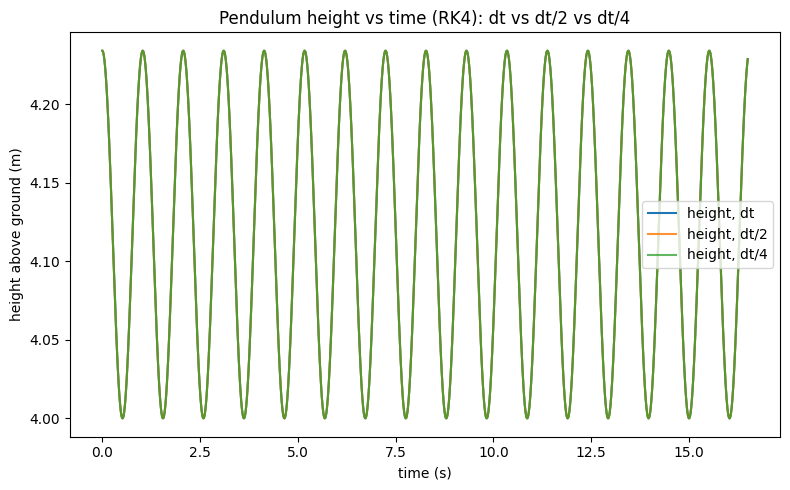

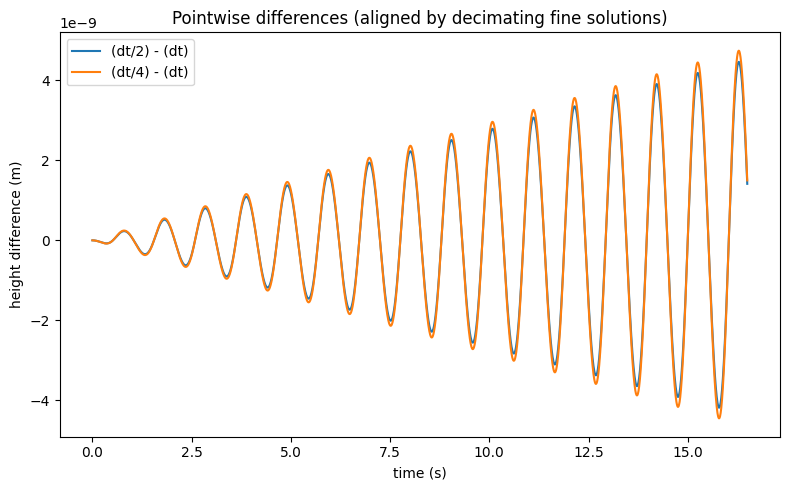

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# --- params (as you had) ---
pendulum_length = 1.0
theta_0 = 40.0
t_final = 16.5
dt = 0.005
n_steps = int(t_final/dt)
ceiling_h = 5.0

# your pendulum_rk4(...) assumed to be defined above

# --- runs ---
pos_x, pos_y, times, thetas, theta_dots = pendulum_rk4(dt, n_steps, theta_0, pendulum_length)
h1 = ceiling_h + pos_y

dt2 = dt/2.0
n_steps2 = int(t_final/dt2)
pos_x2, pos_y2, times2, thetas2, theta_dots2 = pendulum_rk4(dt2, n_steps2, theta_0, pendulum_length)
h2 = ceiling_h + pos_y2

dt4 = dt2/2.0
n_steps4 = int(t_final/dt4)
pos_x4, pos_y4, times4, thetas4, theta_dots4 = pendulum_rk4(dt4, n_steps4, theta_0, pendulum_length)
h4 = ceiling_h + pos_y4

# --- Richardson estimates at final time (RK4 divide-by-15) ---
y_h  = h1[-1]
y_h2 = h2[-1]
y_h4 = h4[-1]   # <- FIXED

err_est_h   = (y_h2 - y_h)  / 15.0
err_est_h2  = (y_h4 - y_h2) / 15.0
ratio = abs((y_h2 - y_h) / (y_h4 - y_h2))  # should be ~16 for RK4

# Optional Richardson-extrapolated value
y_star = y_h2 + (y_h2 - y_h)/15.0

print(f"Final height (dt)     : {y_h:.12f} m")
print(f"Final height (dt/2)   : {y_h2:.12f} m")
print(f"Final height (dt/4)   : {y_h4:.12f} m")
print(f"RK4 err est from dt   : {abs(err_est_h):.3e} m")
print(f"RK4 err est from dt/2 : {abs(err_est_h2):.3e} m")
print(f"convergence ratio     : {ratio:.3f}  (target ~16)")
print(f"Richardson y*         : {y_star:.12f} m")

# --- Plots ---
plt.figure(figsize=(8,5))
plt.plot(times,  h1, label="height, dt")
plt.plot(times2, h2, label="height, dt/2", alpha=0.85)
plt.plot(times4, h4, label="height, dt/4", alpha=0.75)   # <- FIXED
plt.xlabel("time (s)")
plt.ylabel("height above ground (m)")
plt.title("Pendulum height vs time (RK4): dt vs dt/2 vs dt/4")
plt.legend()
plt.tight_layout()
plt.show()

# Pointwise differences on coarse grid (no interpolation; just decimate)
h2_on_coarse = h2[::2]  # since dt2 = dt/2
h4_on_coarse = h4[::4]  # since dt4 = dt/4

diff1 = h2_on_coarse - h1
diff2 = h4_on_coarse - h1

plt.figure(figsize=(8,5))
plt.plot(times, diff1, label="(dt/2) - (dt)")
plt.plot(times, diff2, label="(dt/4) - (dt)")
plt.xlabel("time (s)")
plt.ylabel("height difference (m)")
plt.title("Pointwise differences (aligned by decimating fine solutions)")
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
0.005**4

6.25e-10

In [12]:
# use y_h = h1[-1], y_h2 = h2[-1], y_h4 = h4[-1]
e1 = (y_h2 - y_h)/15.0
e2 = (y_h4 - y_h2)/15.0
R  = (y_h2 - y_h)/(y_h4 - y_h2)

# pick reference value and compute digits
y_ref = y_h4
rel_err = abs(e2)/abs(y_ref)
digits = -np.log10(rel_err)

print(f"e1={e1:.3e}, e2={e2:.3e}, ratio~{R:.2f}")
print(f"relative error ≈ {rel_err:.3e}  →  ~{digits:.1f} correct digits")


e1=9.421e-11, e2=5.691e-12, ratio~16.55
relative error ≈ 1.346e-12  →  ~11.9 correct digits


In [16]:
from pathlib import Path
CODE_SNIPPET = Path("pendulum.py").read_text(encoding="utf-8")


In [22]:
#### START OF CODE
import numpy as np

g=9.81 # m/s^2
pendulum_length = 1 # meters
theta_0 = 40 # degrees
t_final = 18.5 # seconds
dt=0.005 # seconds
n_steps=int(t_final/dt)

def pendulum_rk4(dt, n_steps, initial_theta_degrees, l):
    ''' RK4 integrator to solve the Simple Pendulum ODE system:
        d^2 theta / d theta ^2 = -(g/l)sin(theta)
        returns the x,y position, time, theta and d theta/ dt arrays with n_steps steps
    '''
    theta_old = initial_theta_degrees*(np.pi/180)

    theta_dot_old = 0

    pos_x = np.zeros(n_steps+1)
    pos_y = np.zeros(n_steps+1)
    times = np.zeros(n_steps+1)
    thetas = np.zeros(n_steps+1)
    theta_dots = np.zeros(n_steps+1)

    ## initial conditions
    pos_x[0] = np.sin(theta_old)*l
    pos_y[0] = -np.cos(theta_old)*l
    times[0] = 0
    thetas[0] = theta_old
    

    t_new = 0
    for i in range(n_steps):
        t_new += dt

        
        k1_theta = theta_dot_old
        k1_theta_dot = -(g/l)*np.sin(theta_old) ## use ODE equation for k_theta_dot

        k2_theta = theta_dot_old + k1_theta_dot*dt/2 
        k2_theta_dot = -(g/l)*np.sin(theta_old + k1_theta*dt/2)

        k3_theta = theta_dot_old + k2_theta_dot*dt/2
        k3_theta_dot = -(g/l)*np.sin(theta_old + k2_theta*dt/2)


        k4_theta = theta_dot_old + k3_theta_dot*dt
        k4_theta_dot =  -(g/l)*np.sin(theta_old + k3_theta*dt)

        ## use k1,k2,k3,k4 to update theta and dtheta/ dt
        theta_new = theta_old + dt * (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta)/6 
        theta_dot_new = theta_dot_old + dt * (k1_theta_dot + 2*k2_theta_dot + 2*k3_theta_dot + k4_theta_dot)/6 


        ### update arrays
        pos_x[i+1] = np.sin(theta_new)*l
        pos_y[i+1] = -np.cos(theta_new)*l
        times[i+1] = times[i]+dt
        thetas[i+1] = theta_new
        theta_dots[i+1] = theta_dot_new
        ###

        theta_old = theta_new
        theta_dot_old = theta_dot_new
        
    return pos_x, pos_y, times, thetas, theta_dots



pos_x, pos_y, times, thetas, theta_dots = pendulum_rk4(dt, n_steps, theta_0, pendulum_length)

print(f"After {round(times[-1], 2)} seconds, the pedulum bob has height {round(5 + pos_y[-1], 4)} meters")
#### END OF CODE

After 18.5 seconds, the pedulum bob has height 4.2056 meters


In [23]:
thetas[-1]

0.6528132576291045